# COMP4211 Programming Assignment 1
**IMRAN, Shayan**<br />
**20316792**<br />
[simran@connect.ust.hk](mailto:simran@connect.ust.hk)
<br/>

---

### Load the datasets from the provided npz files
Also define a function for timing functions

In [1]:
import numpy as np
import time
np.random.seed(12)

datasets = {}
datasets["fifa"] = np.load("./datasets/fifa.npz")
datasets["finance"] = np.load("./datasets/finance.npz")
datasets["orbits"] = np.load("./datasets/orbits.npz")

# second order function that runs the function in the argument, prints out the time taken for the function to run and returns the result 
# of the function
def timedFunc(function, *params):
    start = time.time()
    if params != None:
        x = function(*params)
    end = time.time()
    print("Time taken by function " + function.__name__ +": " + str(end - start))
    return x

---
## Linear Regression
### Define functions to perform linear regression with the following parameters:
1. fit_intercept = True
2. normalize = True

The regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm.
Also define a function to plot error histograms that plots 250 bins each of size 0.035/250 = 0.0014

In [2]:
import sklearn.linear_model
import sklearn.metrics
import matplotlib
import matplotlib.pyplot as plt

def linearRegression(train_X, train_Y, test_X, test_Y):
    model = sklearn.linear_model.LinearRegression(fit_intercept=True)
    model.fit(train_X, train_Y)
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    
    return {"train_pred": train_pred,
            "test_pred": test_pred,
            "train_mse": sklearn.metrics.mean_squared_error(train_Y, train_pred), 
            "test_mse": sklearn.metrics.mean_squared_error(test_Y, test_pred),
            "train_r2": sklearn.metrics.r2_score(train_Y, train_pred),
            "test_r2": sklearn.metrics.r2_score(test_Y, test_pred)}

def plotErrorHistogram(pred, actual, title=None):
    pred_test_tuples = zip(pred, actual)
    squared_errors = [(i[0] - i[1])**2 for i in pred_test_tuples]
    plt.hist(squared_errors, bins=np.linspace(0, 0.035, 250), label="Squared Error")
    plt.title(title)
    plt.legend(loc='best')
    
def plotResidualScatter(pred, actual, title=None):
    plt.title(title)
    vals = [[i[0], i[0] - i[1]] for i in zip(pred, actual)]
    plt.scatter([i[0] for i in vals],[i[1] for i in vals], s=4)

### Perform linear regression on all three datasets

In [3]:
fifa_lin_reg = timedFunc(linearRegression, 
                         datasets["fifa"]["train_X"],
                         datasets["fifa"]["regression_train_Y"],
                         datasets["fifa"]["test_X"],
                         datasets["fifa"]["regression_test_Y"])

finance_lin_reg = timedFunc(linearRegression, 
                            datasets["finance"]["train_X"],
                            datasets["finance"]["regression_train_Y"],
                            datasets["finance"]["test_X"],
                            datasets["finance"]["regression_test_Y"])

orbits_lin_reg = timedFunc(linearRegression,
                           datasets["orbits"]["train_X"],
                           datasets["orbits"]["regression_train_Y"],
                           datasets["orbits"]["test_X"],
                           datasets["orbits"]["regression_test_Y"])

Time taken by function linearRegression: 0.019989490509033203
Time taken by function linearRegression: 0.0029990673065185547
Time taken by function linearRegression: 0.003998994827270508


In [4]:
import pandas as pd

columns = list(list(fifa_lin_reg.keys())[2:])
vals = []
vals.append(list(fifa_lin_reg.values())[2:])
vals.append(list(finance_lin_reg.values())[2:])
vals.append(list(orbits_lin_reg.values())[2:])

df = pd.DataFrame(vals, index=["Fifa", "Finance", "Orbits"], columns=columns)
df.head()

,train_mse,test_mse,train_r2,test_r2
Fifa,3.373700e-03,3.305544e-03,0.838373,0.842251
Finance,9.557832e-12,9.462171e-12,1.000000,1.000000
Orbits,5.115185e-03,4.999975e-03,0.686264,0.695042


As can be observed from the table, linear regression results in a very low mean squared error for the Finance training and test data, and a perfect r2 score suggesting the regression perfectly fits the data. The Fifa dataset fits the data well with a low mean squared error and r2 scores that are higher than 80% on both the training set and the test set. The Orbits dataset has a mean squared error and an r2 score that is less than the other two datasets indicating lower performance. The r2 scores on their own may not be enough, however, to check the performance of the model. For this reason, residual vs fitted value scatter plots for the regression are provided below for further insight.

### Residual vs Fits Plots

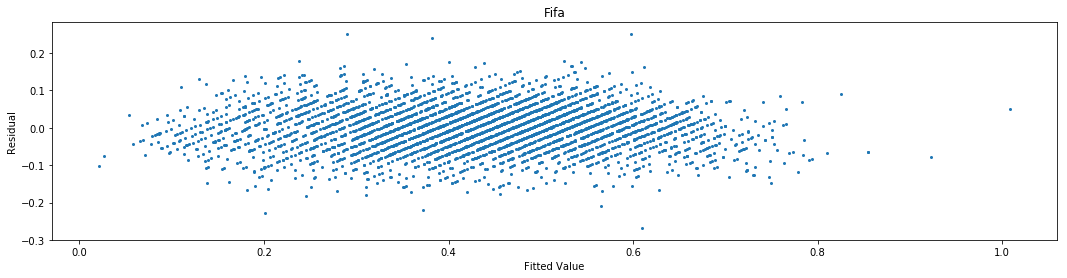

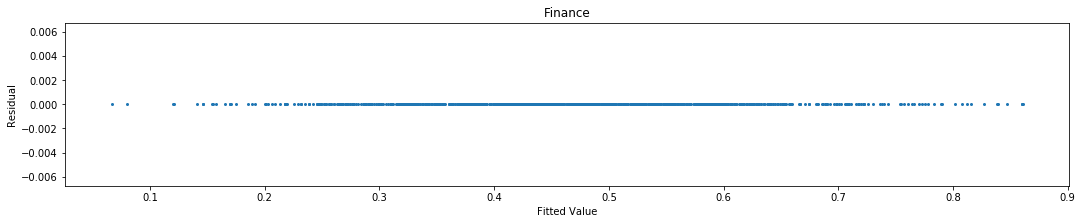

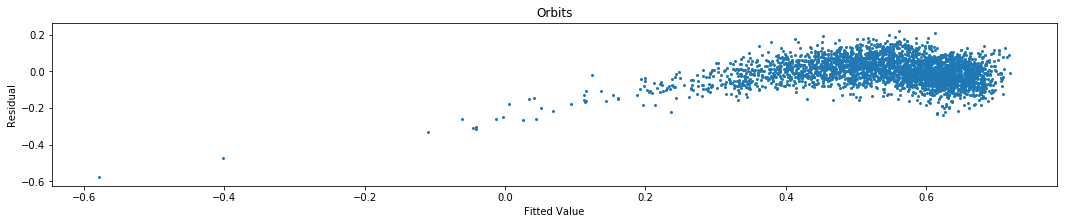

In [5]:
plt.figure(figsize=(18,4))
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plotResidualScatter(fifa_lin_reg["test_pred"], datasets["fifa"]["regression_test_Y"], "Fifa")

plt.figure(figsize=(18,3))
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plotResidualScatter(finance_lin_reg["test_pred"], datasets["finance"]["regression_test_Y"], "Finance")

plt.figure(figsize=(18,3))
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plotResidualScatter(orbits_lin_reg["test_pred"], datasets["orbits"]["regression_test_Y"], "Orbits")
plt.show()

The Finance dataset is perfectly modelled so all the points lie on the horizontal axis meaning that the predicted and actual values are all the same within a very small margin of error. This further proves that this dataset works extremely well with linear regression. The residual vs fits plots for the Fifa datasets shows that the residues are somewhat randomly distributed across the horizontal axis, which means the data is appropriate for modelling with linear regression. The plot for Orbits, however, does not show a very randomly distributed pattern, with y values showing an increasing trend from 0 to 0.5, and then a decreasing trend from 0.5 to 1. This indicates that linear regression may not be appropriate to model this data, a non linear model may have better performance.

### Plot the error histograms for linear regression on the training and test sets for each dataset

Time taken by function plotErrorHistogram: 0.1249241828918457
Time taken by function plotErrorHistogram: 0.11793375015258789
Time taken by function plotErrorHistogram: 0.1689157485961914
Time taken by function plotErrorHistogram: 0.11893081665039062
Time taken by function plotErrorHistogram: 0.11691975593566895
Time taken by function plotErrorHistogram: 0.11493349075317383


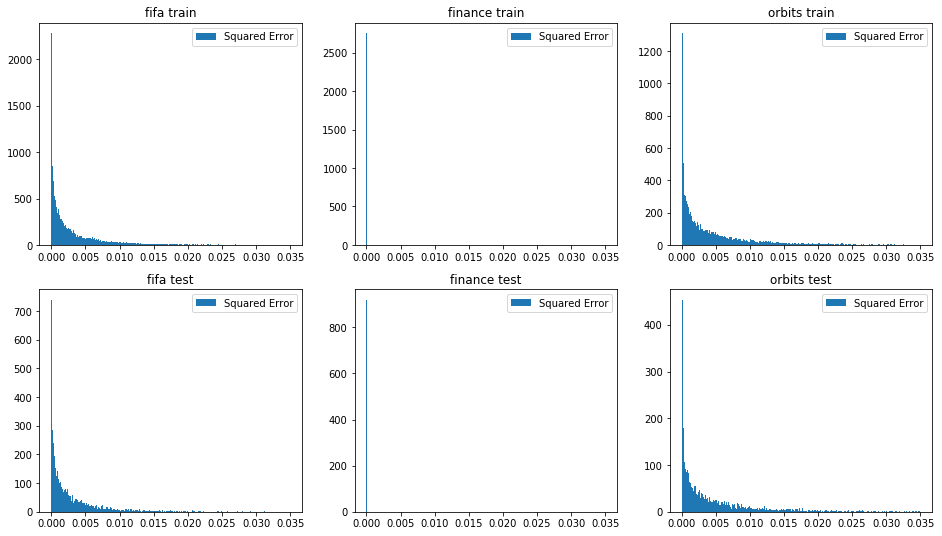

Time taken by function show: 2.750332832336426


In [6]:
plt.figure(figsize=(16,9))

plt.subplot("231")
timedFunc(plotErrorHistogram, fifa_lin_reg["train_pred"], datasets["fifa"]["regression_train_Y"], "fifa train")
plt.subplot("232")
timedFunc(plotErrorHistogram, finance_lin_reg["train_pred"], datasets["finance"]["regression_train_Y"], "finance train")
plt.subplot("233")
timedFunc(plotErrorHistogram, orbits_lin_reg["train_pred"], datasets["orbits"]["regression_train_Y"], "orbits train")
plt.subplot("234")
timedFunc(plotErrorHistogram, fifa_lin_reg["test_pred"], datasets["fifa"]["regression_test_Y"], "fifa test")
plt.subplot("235")
timedFunc(plotErrorHistogram, finance_lin_reg["test_pred"], datasets["finance"]["regression_test_Y"], "finance test")
plt.subplot("236")
timedFunc(plotErrorHistogram, orbits_lin_reg["test_pred"], datasets["orbits"]["regression_test_Y"], "orbits test")
timedFunc(plt.show)

The squared error histogram plots confirm that the regression is performing well as the majority of the points for all three datasets lie between 0 and 0.005, and a very large number for all three result in an error of zero. The Finance plot once again shows that this model behaves perfectly.

---
## Logistic Regression
### Define function for logistic regression with the following parameters:
1. max_iter = 10,000
2. tol = 1e-5
3. random_state = 1
4. learning rate = constant
5. eta0=0.0011

The initial learning rate eta0=0.0011 was found to be the best learning rate after testing several values.

In [21]:
def logisticRegression(train_X, train_Y, test_X, test_Y):
    model = sklearn.linear_model.SGDClassifier(loss='log', max_iter=10000, tol=1e-5, random_state=1, learning_rate='constant', eta0=0.0011)
    model.fit(train_X, train_Y)
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    
    return {"train_pred": train_pred,
            "test_pred": test_pred,
            "train_accuracy": sklearn.metrics.accuracy_score(train_Y, train_pred),
            "test_accuracy": sklearn.metrics.accuracy_score(test_Y, test_pred),
            "train_log_loss": sklearn.metrics.log_loss(y_true=train_Y, y_pred=train_pred), 
            "test_log_loss": sklearn.metrics.log_loss(y_true=test_Y, y_pred=test_pred),
            "train_auc": sklearn.metrics.roc_auc_score(train_Y, train_pred),
            "test_auc": sklearn.metrics.roc_auc_score(test_Y, test_pred),
            "test_precision": sklearn.metrics.precision_score(test_Y, test_pred),
            "test_recall": sklearn.metrics.recall_score(test_Y, test_pred)}

def plotConfusionMatrix(actual, predicted, title):
    cm = sklearn.metrics.confusion_matrix(actual, predicted)
    plt.imshow(cm, interpolation="nearest", cmap="Pastel1")
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ["0", "1"])
    plt.yticks(tick_marks, ["0", "1"])
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    width, height = cm.shape
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]) + " [" + str(np.around(cm[x][y]/len(actual), 3)) + "]", xy=(y, x), 
            horizontalalignment='center',
            verticalalignment='center',)


### Perform logistic regression on all three datasets

In [22]:
fifa_log_reg = timedFunc(logisticRegression,
                         datasets["fifa"]["train_X"],
                         datasets["fifa"]["classification_train_Y"],
                         datasets["fifa"]["test_X"],
                         datasets["fifa"]["classification_test_Y"])

finance_log_reg = timedFunc(logisticRegression, 
                            datasets["finance"]["train_X"],
                            datasets["finance"]["classification_train_Y"],
                            datasets["finance"]["test_X"],
                            datasets["finance"]["classification_test_Y"])

orbits_log_reg = timedFunc(logisticRegression, 
                           datasets["orbits"]["train_X"],
                           datasets["orbits"]["classification_train_Y"],
                           datasets["orbits"]["test_X"],
                           datasets["orbits"]["classification_test_Y"])

Time taken by function logisticRegression: 0.4976990222930908
Time taken by function logisticRegression: 0.21635055541992188
Time taken by function logisticRegression: 1.5040926933288574


### Logistic Regression Metrics

In [23]:
columns = list(list(fifa_log_reg.keys())[2:])
vals = []
vals.append(list(fifa_log_reg.values())[2:])
vals.append(list(finance_log_reg.values())[2:])
vals.append(list(orbits_log_reg.values())[2:])

df = pd.DataFrame(vals, index=["Fifa", "Finance", "Orbits"], columns=columns)
df.head()

,train_accuracy,test_accuracy,train_log_loss,test_log_loss,train_auc,test_auc,test_precision,test_recall
Fifa,0.862482,0.856948,4.749755,4.940896,0.862643,0.857254,0.871910,0.849387
Finance,0.815178,0.791939,6.383594,7.186247,0.815007,0.792316,0.809313,0.776596
Orbits,0.966293,0.965474,1.164204,1.192488,0.965628,0.965293,0.968208,0.967649


The logistic regression training results show that the Orbits dataset was modelled well with accuracy, precision and recall all greater than 96%.

### Plot confusion matrices for the training and test sets for all datasets

Time taken by function plotConfusionMatrix: 0.04197406768798828
Time taken by function plotConfusionMatrix: 0.01798105239868164
Time taken by function plotConfusionMatrix: 0.015993118286132812
Time taken by function plotConfusionMatrix: 0.01699066162109375
Time taken by function plotConfusionMatrix: 0.02298736572265625
Time taken by function plotConfusionMatrix: 0.01700735092163086


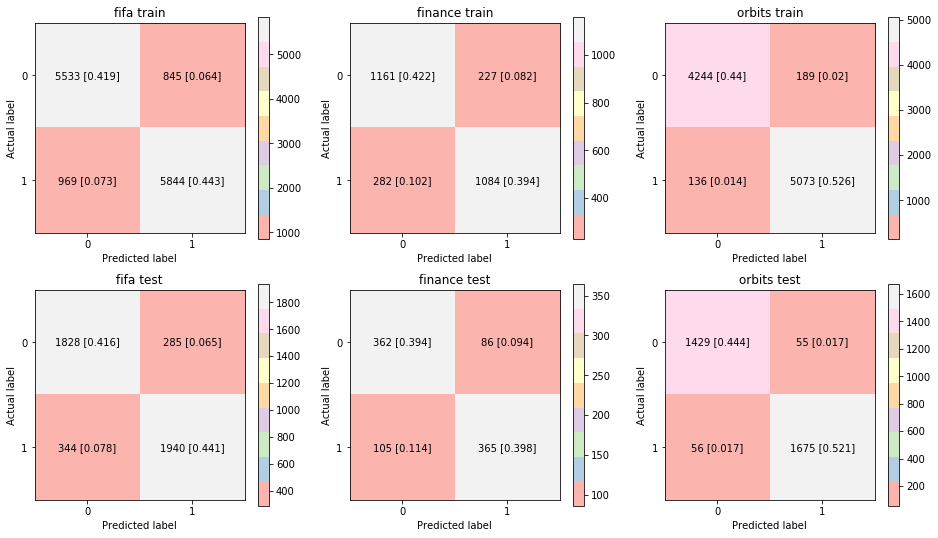

Time taken by function show: 0.7096860408782959


In [10]:
plt.figure(figsize=(16,9))

plt.subplot("231")
timedFunc(plotConfusionMatrix, datasets["fifa"]["classification_train_Y"], fifa_log_reg["train_pred"], "fifa train")
plt.subplot("234")
timedFunc(plotConfusionMatrix, datasets["fifa"]["classification_test_Y"], fifa_log_reg["test_pred"], "fifa test")
plt.subplot("232")
timedFunc(plotConfusionMatrix, datasets["finance"]["classification_train_Y"], finance_log_reg["train_pred"], "finance train")
plt.subplot("235")
timedFunc(plotConfusionMatrix, datasets["finance"]["classification_test_Y"], finance_log_reg["test_pred"], "finance test")
plt.subplot("233")
timedFunc(plotConfusionMatrix, datasets["orbits"]["classification_train_Y"], orbits_log_reg["train_pred"], "orbits train")
plt.subplot("236")
timedFunc(plotConfusionMatrix, datasets["orbits"]["classification_test_Y"], orbits_log_reg["test_pred"], "orbits test")
timedFunc(plt.show)

---
## Neural Network Model
### Define function for neural network model training with the following parameters:
1. activation function = relu
2. max_iter = 2500
3. early stopping = true
4. random state = 0
5. solver = sgd
6. initial learning rate = 0.01
7. learning rate = adaptive
8. tol = 1e-5
9. batch size = auto
10. momentum = 0.9
11. nesterovs momentum = true

The initial learning rate eta0=0.0011 was found to be the best learning rate after testing several values.

In [11]:
from sklearn.neural_network import MLPClassifier
import sklearn

def getTrainValidationSplit(train_X, train_Y):
    return sklearn.model_selection.train_test_split(train_X, train_Y, test_size=0.2)

def nnClassification(size, train_X, test_X, train_Y, test_Y, max_iter=300):
    nn = MLPClassifier(activation='relu', hidden_layer_sizes=(size), max_iter=max_iter, random_state=0,
                       solver='sgd', learning_rate_init=0.01, learning_rate='adaptive', tol=1e-5)
    nn.fit(train_X, train_Y)
    train_pred = nn.predict(train_X)
    test_pred = nn.predict(test_X)
        
    return {"train_pred": train_pred,
            "test_pred": test_pred,
            "loss_curve": nn.loss_curve_,
            "train_score": nn.score(train_X, train_Y), 
            "test_score": nn.score(test_X, test_Y),
            "train_log_loss": sklearn.metrics.log_loss(y_true=train_Y, y_pred=train_pred), 
            "test_log_loss": sklearn.metrics.log_loss(y_true=test_Y, y_pred=test_pred),
            "loss": nn.loss_,
            "train_auc": sklearn.metrics.roc_auc_score(train_Y, train_pred),
            "test_auc": sklearn.metrics.roc_auc_score(test_Y, test_pred),
            "test_precision": sklearn.metrics.precision_score(test_Y, test_pred),
            "test_recall": sklearn.metrics.recall_score(test_Y, test_pred)}

def performCrossValidation(parameters, scoring, train_X, test_X, train_Y, test_Y):
    nn = MLPClassifier(activation='relu', max_iter=1000, random_state=0, solver='sgd', learning_rate_init=0.01, learning_rate='adaptive', tol=1e-5)
    clf = GridSearchCV(nn, parameters, cv=5, scoring=scoring)
    clf.fit(train_X, train_Y)
 
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

    y_pred = clf.predict(test_X)
    print(classification_report(test_Y, y_pred))
    print()
    
    return {"best_params": clf.best_params_,
            "cv_results": clf.cv_results_}

def plot_grid_search(cv_results, grid_param, name_param):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_sd = cv_results['std_test_score']

    lst = []
    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for cnt in range(len(grid_param)):
        s = str(grid_param[cnt])
        lst.append(s)
        
    plt.plot([1,2,3,4,5,6,7,8,9,10], scores_mean, '-o', label= 'test score')

    plt.xlabel(name_param, fontsize=16)
    plt.ylabel('CV Average Score', fontsize=16)
    plt.legend(loc="best", fontsize=15)

    plt.grid(False)

### Perform cross validation to find the best size for the hidden layer

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

parameters = [{'hidden_layer_sizes': [(1), (2), (3), (4), (5), (6), (7), (8), (9), (10)]}]
scoring = "accuracy"

print("CV for Fifa") 
fifa_cv = timedFunc(performCrossValidation, parameters, scoring, datasets["fifa"]["train_X"], datasets["fifa"]["test_X"],
                                 datasets["fifa"]["classification_train_Y"], datasets["fifa"]["classification_test_Y"])

print("CV for Finance")
finance_cv = timedFunc(performCrossValidation, parameters, scoring, datasets["finance"]["train_X"], datasets["finance"]["test_X"],
                                    datasets["finance"]["classification_train_Y"], datasets["finance"]["classification_test_Y"])

print("CV for Orbits")
orbits_cv = timedFunc(performCrossValidation, parameters, scoring, datasets["orbits"]["train_X"], datasets["orbits"]["test_X"],
                                 datasets["orbits"]["classification_train_Y"], datasets["orbits"]["classification_test_Y"])

CV for Fifa
Best parameters set found on development set:

{'hidden_layer_sizes': 4}

Grid scores on development set:

0.860 (+/-0.012) for {'hidden_layer_sizes': 1}
0.861 (+/-0.013) for {'hidden_layer_sizes': 2}
0.860 (+/-0.011) for {'hidden_layer_sizes': 3}
0.861 (+/-0.014) for {'hidden_layer_sizes': 4}
0.861 (+/-0.013) for {'hidden_layer_sizes': 5}
0.861 (+/-0.013) for {'hidden_layer_sizes': 6}
0.861 (+/-0.013) for {'hidden_layer_sizes': 7}
0.861 (+/-0.013) for {'hidden_layer_sizes': 8}
0.861 (+/-0.012) for {'hidden_layer_sizes': 9}
0.861 (+/-0.012) for {'hidden_layer_sizes': 10}
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      2113
         1.0       0.87      0.85      0.86      2284

   micro avg       0.86      0.86      0.86      4397
   macro avg       0.86      0.86      0.86      4397
weighted avg       0.86      0.86      0.86      4397


Time taken by function performCrossValidation: 157.6978862285614
CV for Finance
Be

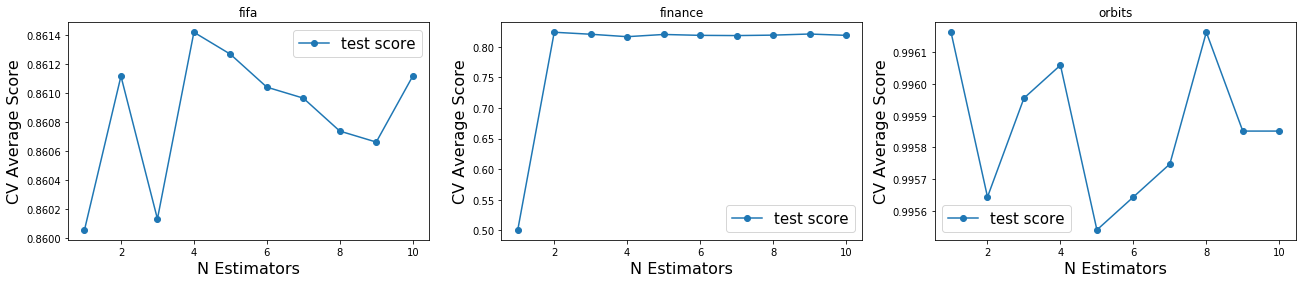

In [13]:
plt.figure(figsize=(22,4))

plt.subplot("131")
plt.title("fifa")
plot_grid_search(fifa_cv["cv_results"], fifa_cv["cv_results"]['params'], 'N Estimators')

plt.subplot("132")
plt.title("finance")
plot_grid_search(finance_cv["cv_results"], finance_cv["cv_results"]['params'], 'N Estimators')

plt.subplot("133")
plt.title("orbits")
plot_grid_search(orbits_cv["cv_results"], orbits_cv["cv_results"]['params'], 'N Estimators')

plt.show()

### Select the hidden layer size with the lowest loss

In [14]:
fifa_size = fifa_cv["best_params"]["hidden_layer_sizes"]
finance_size = finance_cv["best_params"]["hidden_layer_sizes"]
orbits_size = orbits_cv["best_params"]["hidden_layer_sizes"]

print("Hidden layer sizes with the lowest loss:\nFifa: " + str(fifa_size) + "\nFinance: " + str(finance_size) + "\nOrbits: " + str(orbits_size))

Hidden layer sizes with the lowest loss:
Fifa: 4
Finance: 2
Orbits: 1


In [15]:
from sklearn.model_selection import learning_curve
def plotLearningCurve(train_X, train_Y, size, title, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        MLPClassifier(hidden_layer_sizes=(size), activation='relu', max_iter=3000, random_state=0, solver='sgd', learning_rate_init=0.01, learning_rate='adaptive', tol=1e-5),
        train_X, train_Y, cv=5, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    

Time taken by function plotLearningCurve: 46.606651306152344
Time taken by function plotLearningCurve: 20.511902809143066
Time taken by function plotLearningCurve: 103.55964636802673


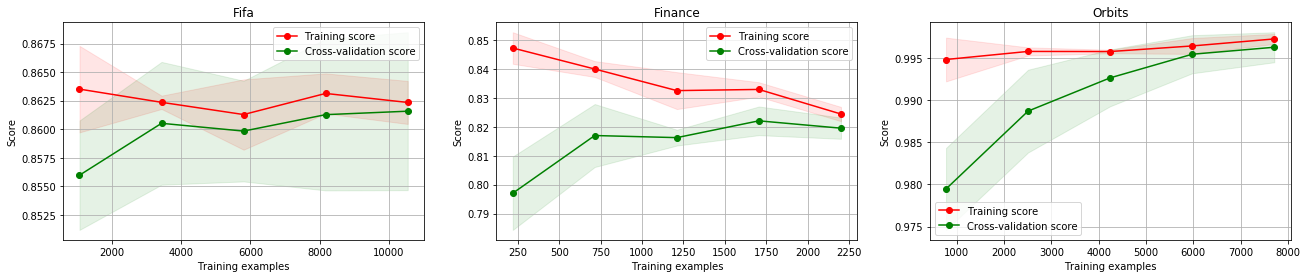

In [16]:
plt.figure(figsize=(22, 4))

plt.subplot("131")
plt.title("fifa")
timedFunc(plotLearningCurve, datasets["fifa"]["train_X"], datasets["fifa"]["classification_train_Y"], fifa_size, "Fifa")

plt.subplot("132")
plt.title("finance")
timedFunc(plotLearningCurve, datasets["finance"]["train_X"], datasets["finance"]["classification_train_Y"], finance_size, "Finance")

plt.subplot("133")
plt.title("orbits")
timedFunc(plotLearningCurve, datasets["orbits"]["train_X"], datasets["orbits"]["classification_train_Y"], orbits_size, "Orbits")

### Train neural network on all three datasets

In [17]:
fifa_nn = timedFunc(nnClassification, fifa_size, datasets["fifa"]["train_X"], datasets["fifa"]["test_X"],
                           datasets["fifa"]["classification_train_Y"], datasets["fifa"]["classification_test_Y"], 500)

finance_nn = timedFunc(nnClassification, finance_size, datasets["finance"]["train_X"], datasets["finance"]["test_X"],
                              datasets["finance"]["classification_train_Y"], datasets["finance"]["classification_test_Y"], 500)

orbits_nn = timedFunc(nnClassification, orbits_size, datasets["orbits"]["train_X"], datasets["orbits"]["test_X"],
                             datasets["orbits"]["classification_train_Y"], datasets["orbits"]["classification_test_Y"], 800)

Time taken by function nnClassification: 3.7313246726989746
Time taken by function nnClassification: 1.3828811645507812
Time taken by function nnClassification: 5.812797546386719


### Model training metrics

In [18]:
columns = list(list(fifa_nn.keys())[3:])
vals = []
vals.append(list(fifa_nn.values())[3:])
vals.append(list(finance_nn.values())[3:])
vals.append(list(orbits_nn.values())[3:])

df = pd.DataFrame(vals, index=["Fifa", "Finance", "Orbits"], columns=columns)
df.head()

,train_score,test_score,train_log_loss,test_log_loss,loss,train_auc,test_auc,test_precision,test_recall
Fifa,0.862785,0.856266,4.739281,4.964463,0.314037,0.862936,0.856385,0.867765,0.853327
Finance,0.830792,0.811547,5.844316,6.509016,0.383500,0.830717,0.811517,0.817987,0.812766
Orbits,0.997200,0.996267,0.096718,0.128917,0.027944,0.997139,0.996341,0.997684,0.995378


### Plot model loss over training iterations

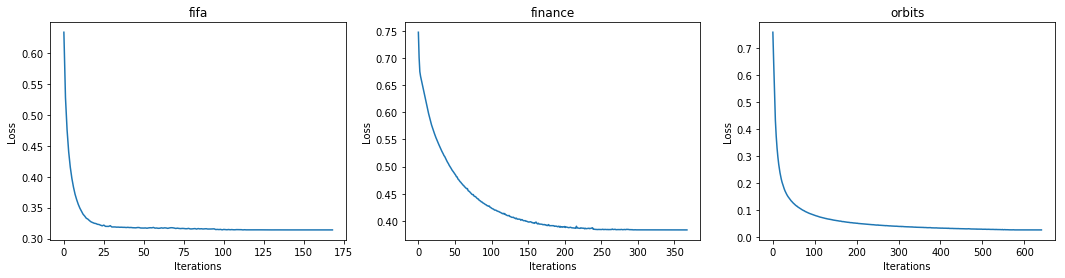

In [19]:
plt.figure(figsize=(18,4))

plt.subplot("131")
plt.title("fifa")
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.plot(fifa_nn["loss_curve"])

plt.subplot("132")
plt.title("finance")
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.plot(finance_nn["loss_curve"])

plt.subplot("133")
plt.title("orbits")
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.plot(orbits_nn["loss_curve"])

plt.show()

### Plot confusion matrices for the training and test sets for all datasets

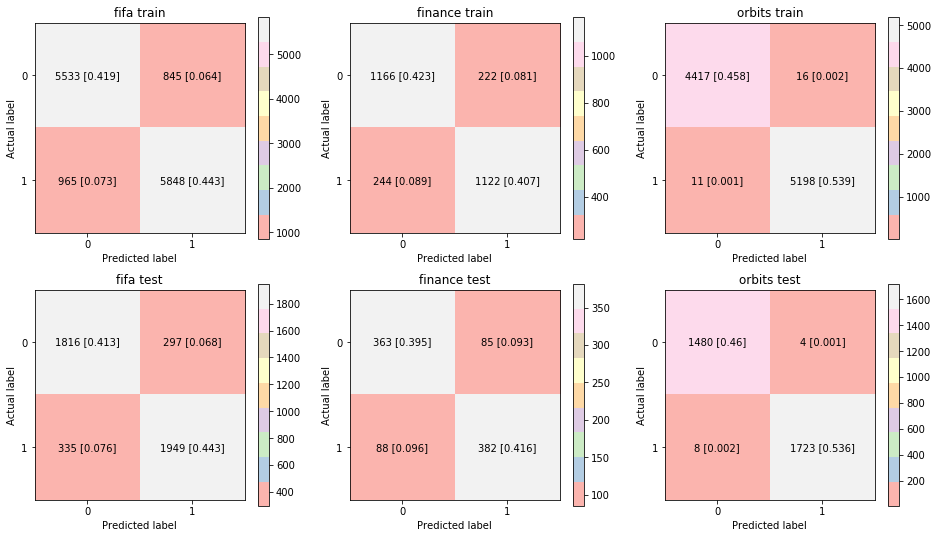

Time taken by function show: 0.6876752376556396


In [20]:
plt.figure(figsize=(16,9))

plt.subplot("231")
plotConfusionMatrix(datasets["fifa"]["classification_train_Y"], fifa_nn["train_pred"], "fifa train")
plt.subplot("234")
plotConfusionMatrix(datasets["fifa"]["classification_test_Y"], fifa_nn["test_pred"], "fifa test")
plt.subplot("232")
plotConfusionMatrix(datasets["finance"]["classification_train_Y"], finance_nn["train_pred"], "finance train")
plt.subplot("235")
plotConfusionMatrix(datasets["finance"]["classification_test_Y"], finance_nn["test_pred"], "finance test")
plt.subplot("233")
plotConfusionMatrix(datasets["orbits"]["classification_train_Y"], orbits_nn["train_pred"], "orbits train")
plt.subplot("236")
plotConfusionMatrix(datasets["orbits"]["classification_test_Y"], orbits_nn["test_pred"], "orbits test")
timedFunc(plt.show)